Data Mining Project
Group:7

Water Quality Prediction

# Import necessary packages and libraries

In [3]:
!pip install seaborn[stats]
!pip install matplotlib
!pip install lightgbm


In [4]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Data

In [5]:
data=pd.read_csv(r'D:\MSDA (UHD)\Sem 2\Data Mining\Project_7\Water Quality Prediction.csv')
data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [6]:
print('\nData Dimensions : ')
print(data.shape,'\n')


Data Dimensions : 
(1048575, 24) 



In [7]:
print('\nData Info. : ')
print(data.info(), '\n')


Data Info. : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Color                   1047594 non-null  object 
 8   Turbidity               1039881 non-null  float64
 9   Fluoride                1015357 non-null  float64
 10  Copper                  1013693 non-null  float64
 11  Odor                    1017243 non-null  float64
 12  Sulfate                 1014050 non-null  float64
 13  Conductivity            1019772 non-null  

In [8]:
data.isnull().sum()

Index                         0
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Month                     16921
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

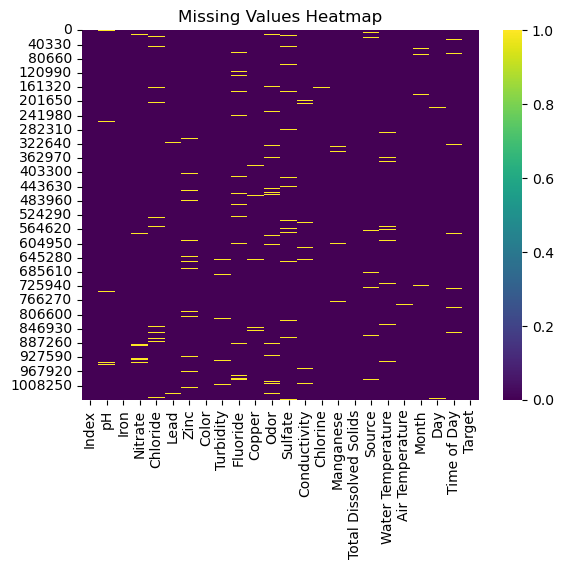

In [9]:
# Generate the heatmap for missing values
sns.heatmap(data.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Data statistics

In [10]:
data.describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,1.048575e+06,1.028344e+06,1.041584e+06,1.029880e+06,1.017741e+06,1.043891e+06,1.020900e+06,1.039881e+06,1.015357e+06,1.013693e+06,...,1.014050e+06,1.019772e+06,1.038413e+06,1.029236e+06,1.048277e+06,1.018887e+06,1.043272e+06,1.031026e+06,1.028214e+06,1.048575e+06
mean,5.242870e+05,7.449869e+00,1.139646e-01,6.078584e+00,1.818660e+02,1.291635e-03,1.528928e+00,4.835915e-01,9.410137e-01,4.939443e-01,...,1.446009e+02,4.248376e+02,3.236978e+00,9.352826e-02,2.647872e+02,1.915360e+01,6.003251e+01,1.573196e+01,1.149062e+01,2.295821e-01
std,3.026977e+05,8.478455e-01,4.433188e-01,3.131874e+00,6.576657e+01,3.030129e-02,1.505436e+00,8.614735e-01,7.924903e-01,5.662430e-01,...,6.672156e+01,1.897561e+02,7.150808e-01,4.403703e-01,1.543697e+02,1.137963e+01,1.808397e+01,8.798726e+00,6.925925e+00,4.205643e-01
min,0.000000e+00,2.058008e+00,2.050000e-53,2.861727e-01,2.941350e+01,0.000000e+00,6.350000e-07,1.410000e-14,4.550000e-06,2.100000e-09,...,1.194073e+01,1.305482e+01,9.994110e-01,1.380000e-46,1.064299e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,6.914812e+00,8.950000e-06,3.952811e+00,1.374347e+02,8.290000e-123,4.127921e-01,3.692472e-02,3.706065e-01,1.260900e-01,...,9.746143e+01,2.863260e+02,2.737515e+00,2.060000e-06,1.318069e+02,1.135982e+01,4.784209e+01,8.000000e+00,5.000000e+00,0.000000e+00
50%,5.242870e+05,7.452940e+00,2.054149e-03,5.564798e+00,1.747464e+02,1.520000e-62,1.074800e+00,1.997574e-01,7.654291e-01,3.389322e-01,...,1.339778e+02,3.970023e+02,3.198937e+00,5.372950e-04,2.635694e+02,1.646738e+01,6.002168e+01,1.600000e+01,1.100000e+01,0.000000e+00
75%,7.864305e+05,8.001406e+00,4.977795e-02,7.584930e+00,2.156446e+02,2.820000e-27,2.214154e+00,5.928613e-01,1.318265e+00,6.789152e-01,...,1.803459e+02,5.333383e+02,3.685177e+00,1.369394e-02,3.949597e+02,2.386571e+01,7.223478e+01,2.300000e+01,1.700000e+01,0.000000e+00
max,1.048574e+06,1.289196e+01,1.574860e+01,7.307293e+01,1.430549e+03,3.503948e+00,2.836867e+01,1.929611e+01,1.285171e+01,1.139056e+01,...,1.393433e+03,1.891516e+03,1.068842e+01,2.374086e+01,5.797995e+02,2.430051e+02,1.440785e+02,3.100000e+01,2.300000e+01,1.000000e+00


# Handling Missing values

In [11]:
# Handling Missing values
# Quantitative columns: Imputing with median
quantitative_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 
                        'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 
                        'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature']
for col in quantitative_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Categorical columns: Imputing with mode
categorical_columns = ['Color', 'Source']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Temporal columns: Forward fill
temporal_columns = ['Month', 'Day', 'Time of Day']
for col in temporal_columns:
    data[col].ffill(inplace=True)

In [12]:
## Checking missing values after handling
print("Missing Values:\n", round(data.isnull().sum()*100/data.shape[0],2))

Missing Values:
 Index                     0.0
pH                        0.0
Iron                      0.0
Nitrate                   0.0
Chloride                  0.0
Lead                      0.0
Zinc                      0.0
Color                     0.0
Turbidity                 0.0
Fluoride                  0.0
Copper                    0.0
Odor                      0.0
Sulfate                   0.0
Conductivity              0.0
Chlorine                  0.0
Manganese                 0.0
Total Dissolved Solids    0.0
Source                    0.0
Water Temperature         0.0
Air Temperature           0.0
Month                     0.0
Day                       0.0
Time of Day               0.0
Target                    0.0
dtype: float64


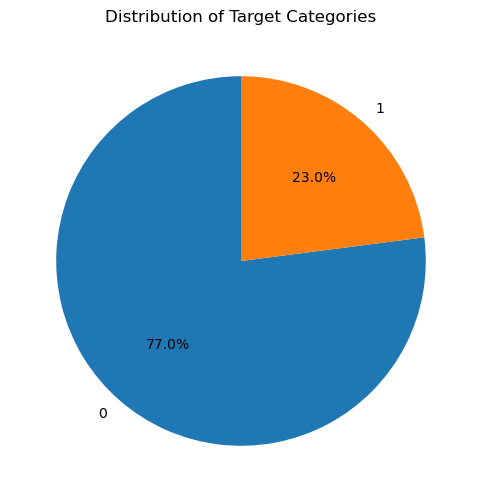

In [12]:
# Calculate the count of each category
target_counts = data['Target'].value_counts()

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Target Categories')

plt.show()

# Slove Class imbalance Problem

In [13]:
import pandas as pd
from sklearn.utils import resample

# Get target counts
target_counts = data['Target'].value_counts()
majority_class = target_counts.idxmax()  # Get the majority class label

# Calculate target class sizes for 65/35 split
majority_class_count = int(0.35 * len(data))  # 35% of total data points for majority class
minority_class_count = len(data) - majority_class_count  # Remaining data points for minority class

# Sample data points from the majority class
majority_class_df = data[data['Target'] == majority_class]
majority_class_sampled = resample(majority_class_df, replace=False, n_samples=majority_class_count)

# Combine minority class with sampled majority class
balanced_data = pd.concat([data[data['Target'] != majority_class], majority_class_sampled])

# Print the target class distribution after balancing
print(balanced_data['Target'].value_counts())


Target
0    367001
1    240734
Name: count, dtype: int64


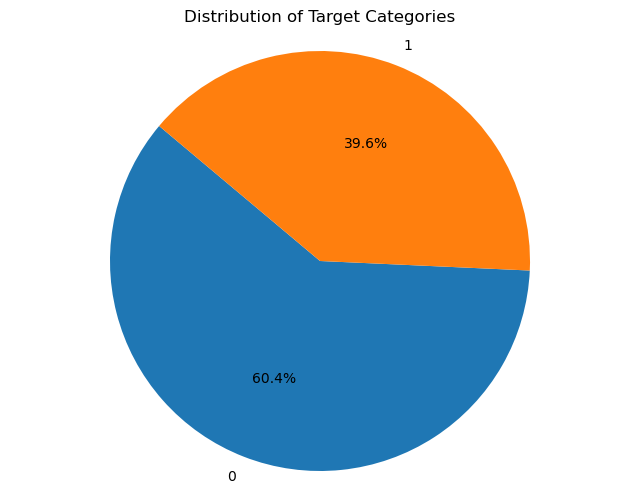

In [14]:
# Count the number of occurrences of each target value
target_counts = balanced_data['Target'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Convert categorical data into a numerical format.

In [15]:
balanced_data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
266755,266755,5.916055,2.619650,1.389334,84.513108,3.340000e-13,1.978032,Faint Yellow,0.248652,1.691318,...,5.966624,1.152750e-02,52.369446,Spring,10.404332,42.508011,March,12.0,23.0,1
266756,266756,7.505590,1.019157,4.908973,190.443656,4.860000e-39,1.128556,Light Yellow,0.000030,0.765429,...,2.635055,1.672900e-04,232.941036,River,12.522236,63.289036,June,4.0,1.0,1
266757,266757,6.703964,0.000137,10.552672,211.930128,1.890000e-48,2.848238,Colorless,0.081378,1.610560,...,3.265975,7.470000e-12,330.241630,Reservoir,15.644198,84.323390,April,28.0,16.0,1
266758,266758,5.396613,0.000005,5.703348,225.017979,1.920000e-28,0.400466,Colorless,0.154662,0.070338,...,3.287618,2.900000e-07,80.026017,Spring,18.005467,55.267615,March,21.0,9.0,1
266759,266759,8.055677,0.002560,4.517260,132.104241,1.440000e-13,1.923391,Light Yellow,0.010267,1.878288,...,3.505797,1.630000e-08,67.661410,River,48.176181,58.447806,April,11.0,17.0,1


# Source Column

In [14]:
# Extract unique values from 'Source' column and sort them
sources_list = list(np.unique(balanced_data['Source']))
sources_list.sort()

# Create a mapping of source values to numerical equivalents
replace_sources_list = list(range(len(sources_list)))

# Replace 'Source' column values with their numerical equivalents
balanced_data['Source'].replace(sources_list, replace_sources_list, inplace=True)

# Color Column

In [15]:
# Define the mapping of color values to numerical equivalents
colors = {
    'Colorless': 0,
    'Near Colorless': 1,
    'Faint Yellow': 2,
    'Light Yellow': 3,
    'Yellow': 4,
}

# Create lists of color names and their numerical equivalents
colors_list = list(colors.keys())
replace_colors_list = list(colors.values())

# Replace 'Color' column values with their numerical equivalents
balanced_data['Color'].replace(colors_list, replace_colors_list, inplace=True)

# Month Column

In [16]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Replace the 'Month' column with numerical equivalents
balanced_data['Month'] = balanced_data['Month'].map(month_mapping)

# Print the value counts of the updated 'Month' column
print(balanced_data['Month'].value_counts())

Month
1     52111
8     51852
5     51682
3     51572
10    51476
12    51328
7     51273
6     50354
9     50001
11    49861
4     49722
2     46503
Name: count, dtype: int64


In [17]:
balanced_data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
266755,266755,5.916055,2.619650,1.389334,84.513108,3.340000e-13,1.978032,2,0.248652,1.691318,...,5.966624,1.152750e-02,52.369446,5,10.404332,42.508011,3,12.0,23.0,1
266756,266756,7.505590,1.019157,4.908973,190.443656,4.860000e-39,1.128556,3,0.000030,0.765429,...,2.635055,1.672900e-04,232.941036,4,12.522236,63.289036,6,4.0,1.0,1
266757,266757,6.703964,0.000137,10.552672,211.930128,1.890000e-48,2.848238,0,0.081378,1.610560,...,3.265975,7.470000e-12,330.241630,3,15.644198,84.323390,4,28.0,16.0,1
266758,266758,5.396613,0.000005,5.703348,225.017979,1.920000e-28,0.400466,0,0.154662,0.070338,...,3.287618,2.900000e-07,80.026017,5,18.005467,55.267615,3,21.0,9.0,1
266759,266759,8.055677,0.002560,4.517260,132.104241,1.440000e-13,1.923391,3,0.010267,1.878288,...,3.505797,1.630000e-08,67.661410,4,48.176181,58.447806,4,11.0,17.0,1


In [18]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607735 entries, 266755 to 197966
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   607735 non-null  int64  
 1   pH                      607735 non-null  float64
 2   Iron                    607735 non-null  float64
 3   Nitrate                 607735 non-null  float64
 4   Chloride                607735 non-null  float64
 5   Lead                    607735 non-null  float64
 6   Zinc                    607735 non-null  float64
 7   Color                   607735 non-null  int64  
 8   Turbidity               607735 non-null  float64
 9   Fluoride                607735 non-null  float64
 10  Copper                  607735 non-null  float64
 11  Odor                    607735 non-null  float64
 12  Sulfate                 607735 non-null  float64
 13  Conductivity            607735 non-null  float64
 14  Chlorine            

In [19]:
balanced_data

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
266755,266755,5.916055,2.619650e+00,1.389334,84.513108,3.340000e-13,1.978032,2,0.248652,1.691318,...,5.966624,1.152750e-02,52.369446,5,10.404332,42.508011,3,12.0,23.0,1
266756,266756,7.505590,1.019157e+00,4.908973,190.443656,4.860000e-39,1.128556,3,0.000030,0.765429,...,2.635055,1.672900e-04,232.941036,4,12.522236,63.289036,6,4.0,1.0,1
266757,266757,6.703964,1.370200e-04,10.552672,211.930128,1.890000e-48,2.848238,0,0.081378,1.610560,...,3.265975,7.470000e-12,330.241630,3,15.644198,84.323390,4,28.0,16.0,1
266758,266758,5.396613,5.040000e-06,5.703348,225.017979,1.920000e-28,0.400466,0,0.154662,0.070338,...,3.287618,2.900000e-07,80.026017,5,18.005467,55.267615,3,21.0,9.0,1
266759,266759,8.055677,2.560466e-03,4.517260,132.104241,1.440000e-13,1.923391,3,0.010267,1.878288,...,3.505797,1.630000e-08,67.661410,4,48.176181,58.447806,4,11.0,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511844,511844,7.357177,2.557220e-04,2.701818,174.746438,1.310000e-126,0.441187,0,1.787989,2.034550,...,3.959057,1.478681e+00,331.722178,6,11.446685,83.306378,6,27.0,11.0,0
825930,825930,8.202839,1.119510e-04,1.919361,225.112836,1.870000e-81,0.045479,0,1.053248,0.082670,...,3.701540,4.083540e-04,367.832860,4,9.527744,58.339419,11,13.0,3.0,0
996844,996844,6.984140,7.310000e-05,8.508146,135.985611,1.730000e-06,0.330800,2,0.502051,0.336136,...,2.918782,7.440000e-06,139.809006,1,13.106539,91.836700,6,2.0,20.0,0
851403,851403,8.190960,7.850000e-07,15.565662,174.746438,7.750000e-119,1.485509,3,0.008054,0.588576,...,2.730239,3.131630e-03,23.445558,7,24.542011,71.485402,8,12.0,5.0,0


# Correlation matrix

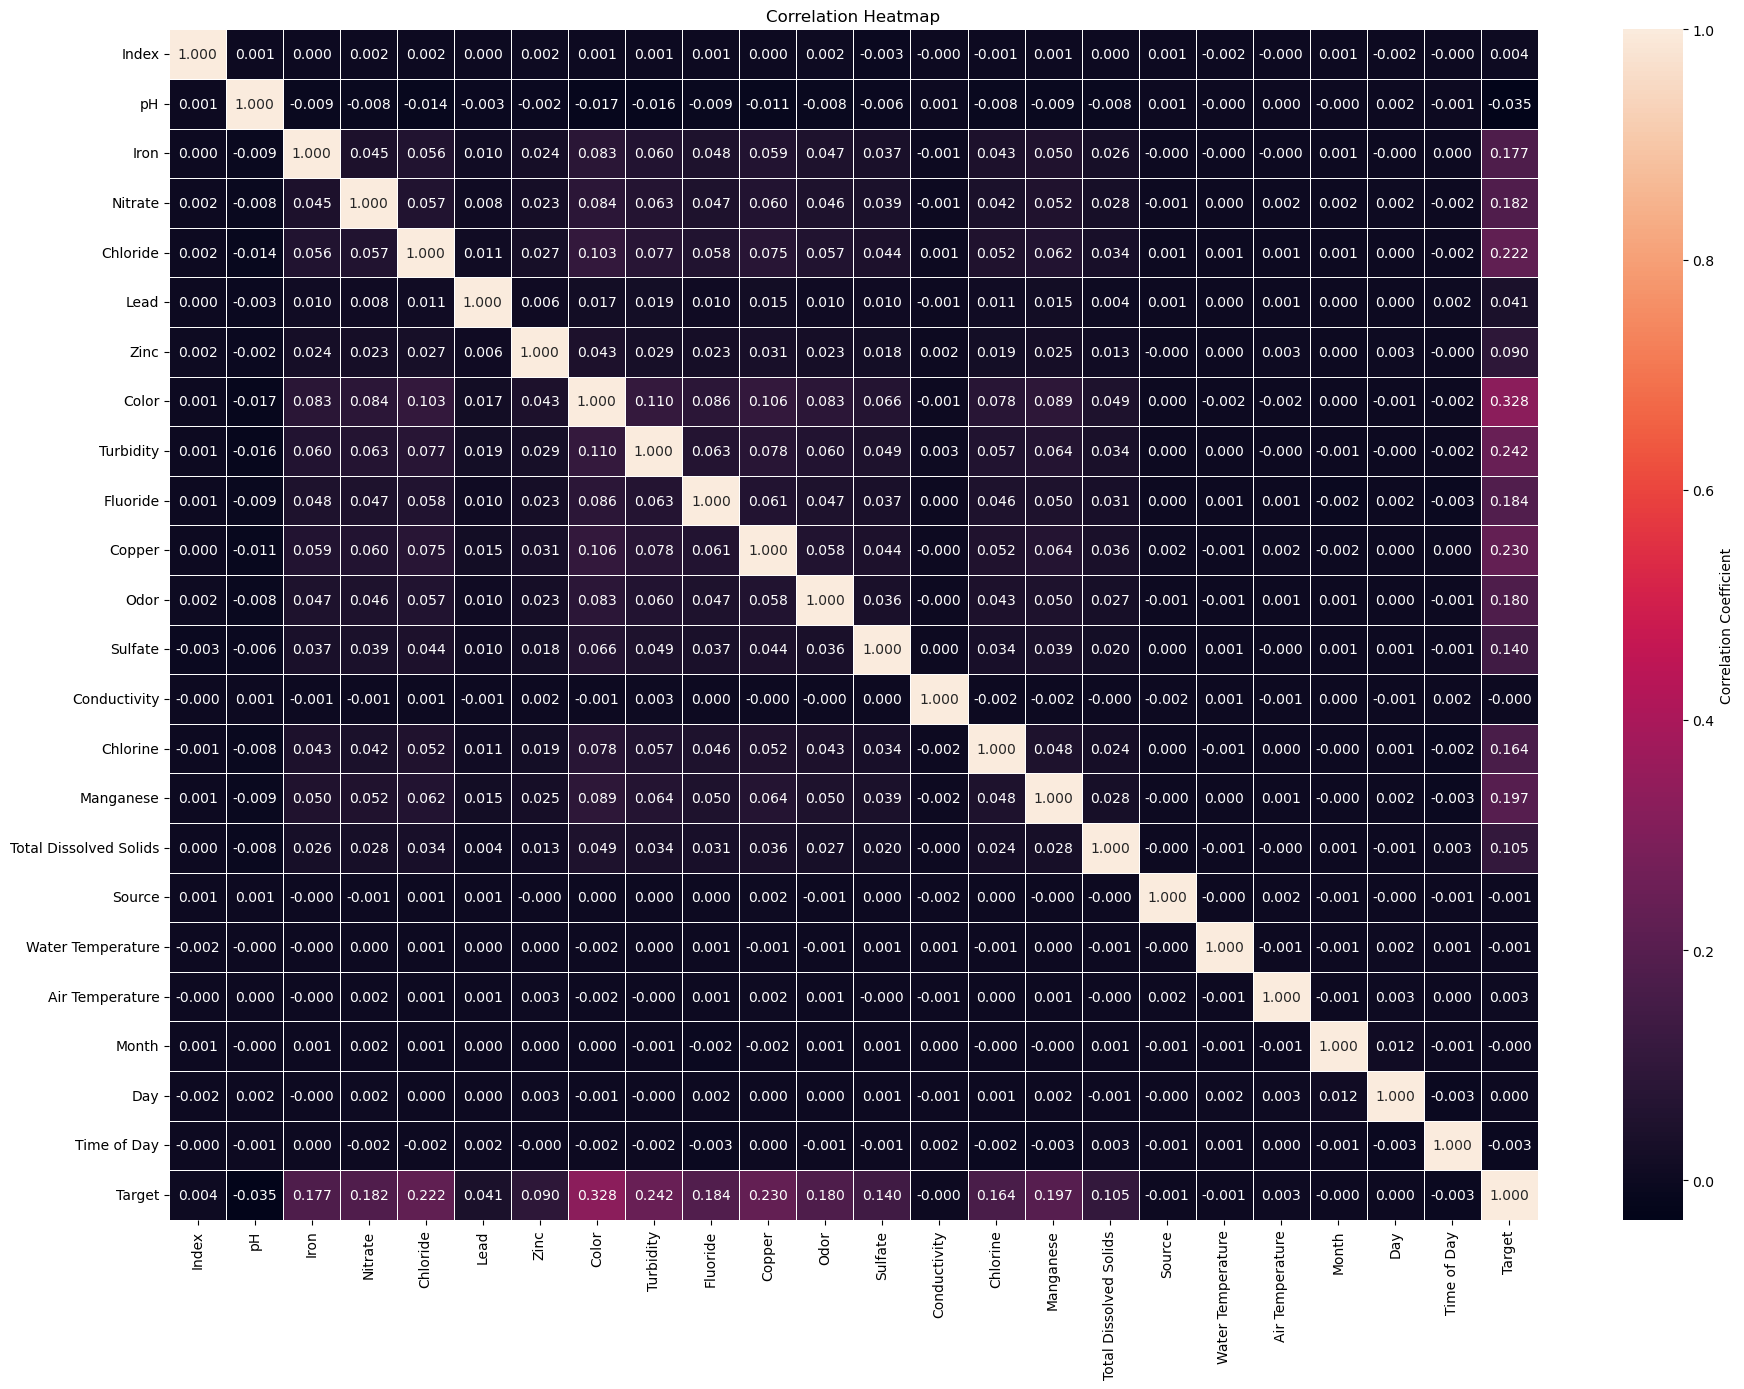

In [22]:
# Set the size of the figure
plt.figure(figsize=(19, 14))

# Generate the heatmap with annotations
sns.heatmap(balanced_data.corr(), annot=True, fmt=".3f",  annot_kws={"size": 10},  
    linewidths=.5,  cbar_kws={'label': 'Correlation Coefficient'} 
)


plt.yticks(rotation=0)  
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# No significant correlation between target label and features.
# We cannot drop any of the columns 
# Just Drop the Index Column 

In [20]:
# Drop Index Column
balanced_data.drop(columns=['Index'], inplace=True)

# Outlier Detection

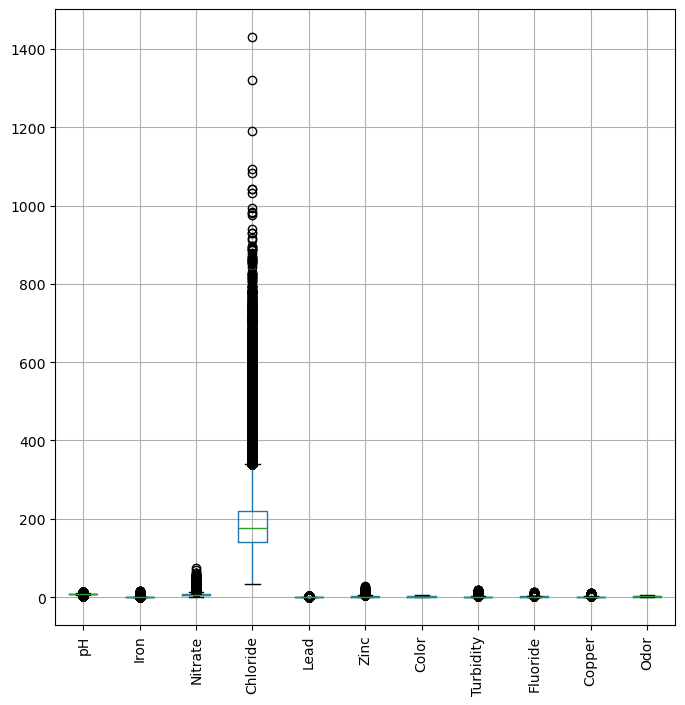

In [21]:
# Create a Boxplot (for example, the first 12 columns)

subset_columns = balanced_data.columns[:11]

balanced_data[subset_columns].boxplot(figsize=(8, 8), rot=90)
plt.show()

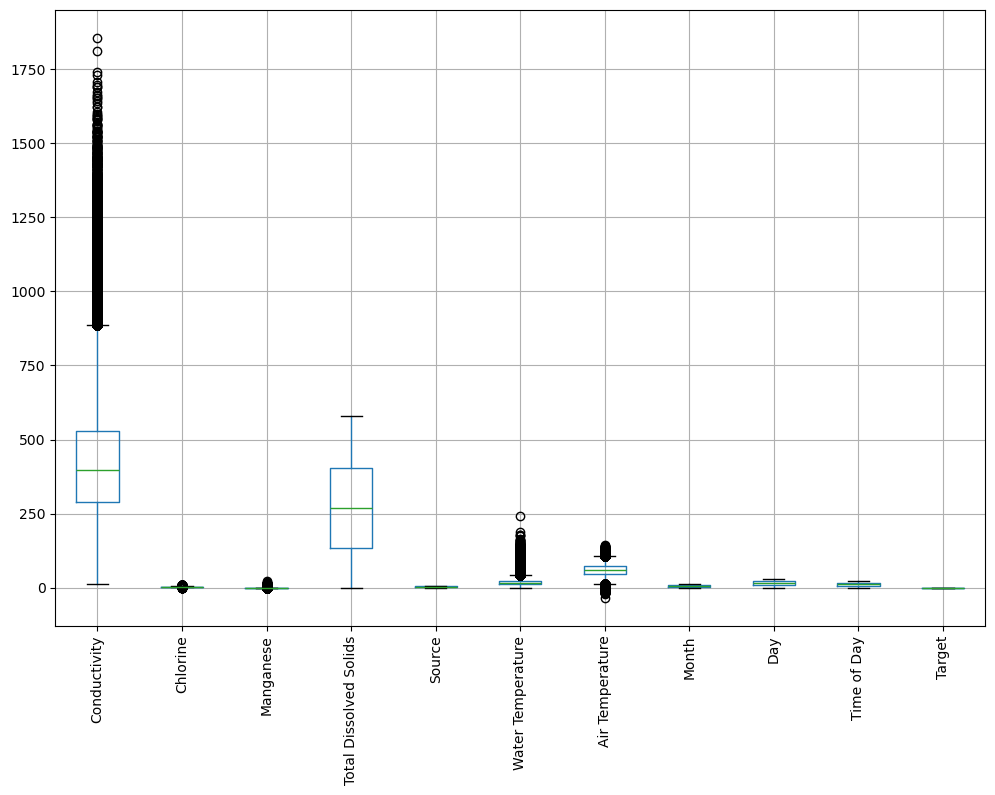

In [25]:
# Create a Boxplot (for example, the other 11 columns)

subset_columns = balanced_data.columns[12:]
balanced_data[subset_columns].boxplot(figsize=(12, 8), rot=90)
plt.show()

In [22]:
# Select only the top columns for outlier detection
numerical_columns = balanced_data.select_dtypes(include=['float64', 'int64'])

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).sum()

outlier_features = outliers.sort_values(ascending=False).head(15).index
outlier_features

Index(['Lead', 'Manganese', 'Iron', 'Turbidity', 'Copper', 'Water Temperature',
       'Fluoride', 'Nitrate', 'Zinc', 'Chloride', 'Sulfate', 'pH',
       'Conductivity', 'Chlorine', 'Air Temperature'],
      dtype='object')

In [23]:
# Calculate the Percentage of the the outlier in each column

Percentage_Outlier = []

for col in balanced_data.columns:
    Q1 = stats.scoreatpercentile(balanced_data[col], 25)
    Q3 = stats.scoreatpercentile(balanced_data[col], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    num_outliers = ((balanced_data[col] < lower_bound) | (balanced_data[col] > upper_bound)).sum()
    percentage = (num_outliers / len(balanced_data)) * 100
    Percentage_Outlier.append({"Column": col, "Percentage of Outliers": percentage})
    
    
Percentage_Outlier_data = pd.DataFrame(Percentage_Outlier)
Percentage_Outlier_data

,Column,Percentage of Outliers
0,pH,2.803525
1,Iron,16.130715
2,Nitrate,3.776317
3,Chloride,3.631188
4,Lead,24.651369
5,Zinc,3.739952
6,Color,0.000000
7,Turbidity,8.570347
8,Fluoride,4.012604
9,Copper,6.018413


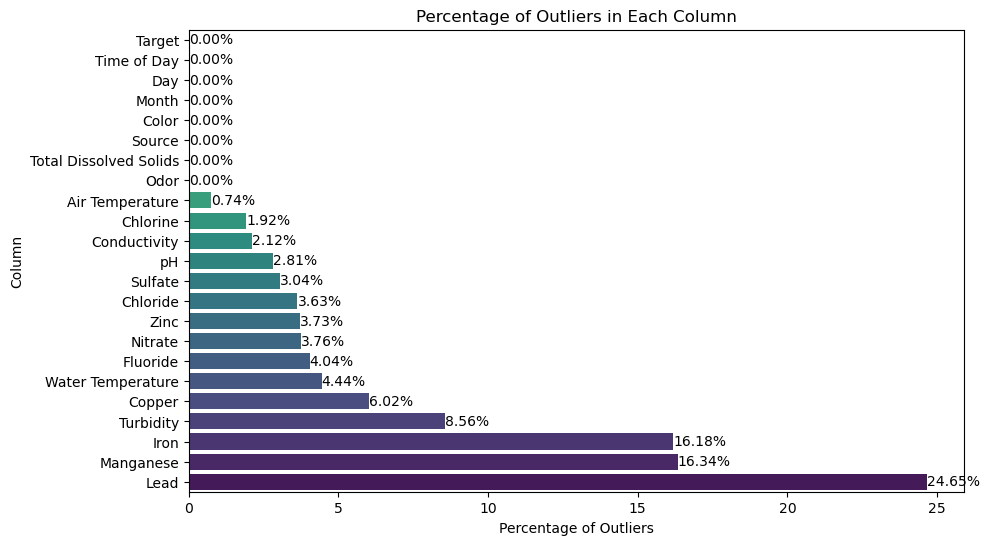

In [28]:
# Sort the data by the percentage of outliers in ascending order
Percentage_Outlier_data_sorted = Percentage_Outlier_data.sort_values(by='Percentage of Outliers', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage of Outliers', y='Column', data=Percentage_Outlier_data_sorted, hue='Column', palette='viridis', legend=False)
plt.gca().invert_yaxis()
plt.title('Percentage of Outliers in Each Column')
plt.xlabel('Percentage of Outliers')
plt.ylabel('Column')
for i, v in enumerate(Percentage_Outlier_data_sorted['Percentage of Outliers']):
    plt.text(v, i, f'{v:.2f}%', va='center')
plt.show()

# Removing Outlier 

In [24]:
# List of columns to exclude from outlier detection
exclude_columns = ['Color', 'Source', 'Month', 'Day', 'Time of Day', 'Target']

for col in balanced_data.columns:
    if col not in exclude_columns and balanced_data[col].dtype != bool:
        try:
            col_data = balanced_data[col].dropna()
            Q1, Q3 = np.percentile(col_data, [25, 75])
            IQR = Q3 - Q1
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR
            balanced_data[col] = np.clip(balanced_data[col], lower_limit, upper_limit)
        except Exception as e:
            print(f"Error in column '{col}': {e}")


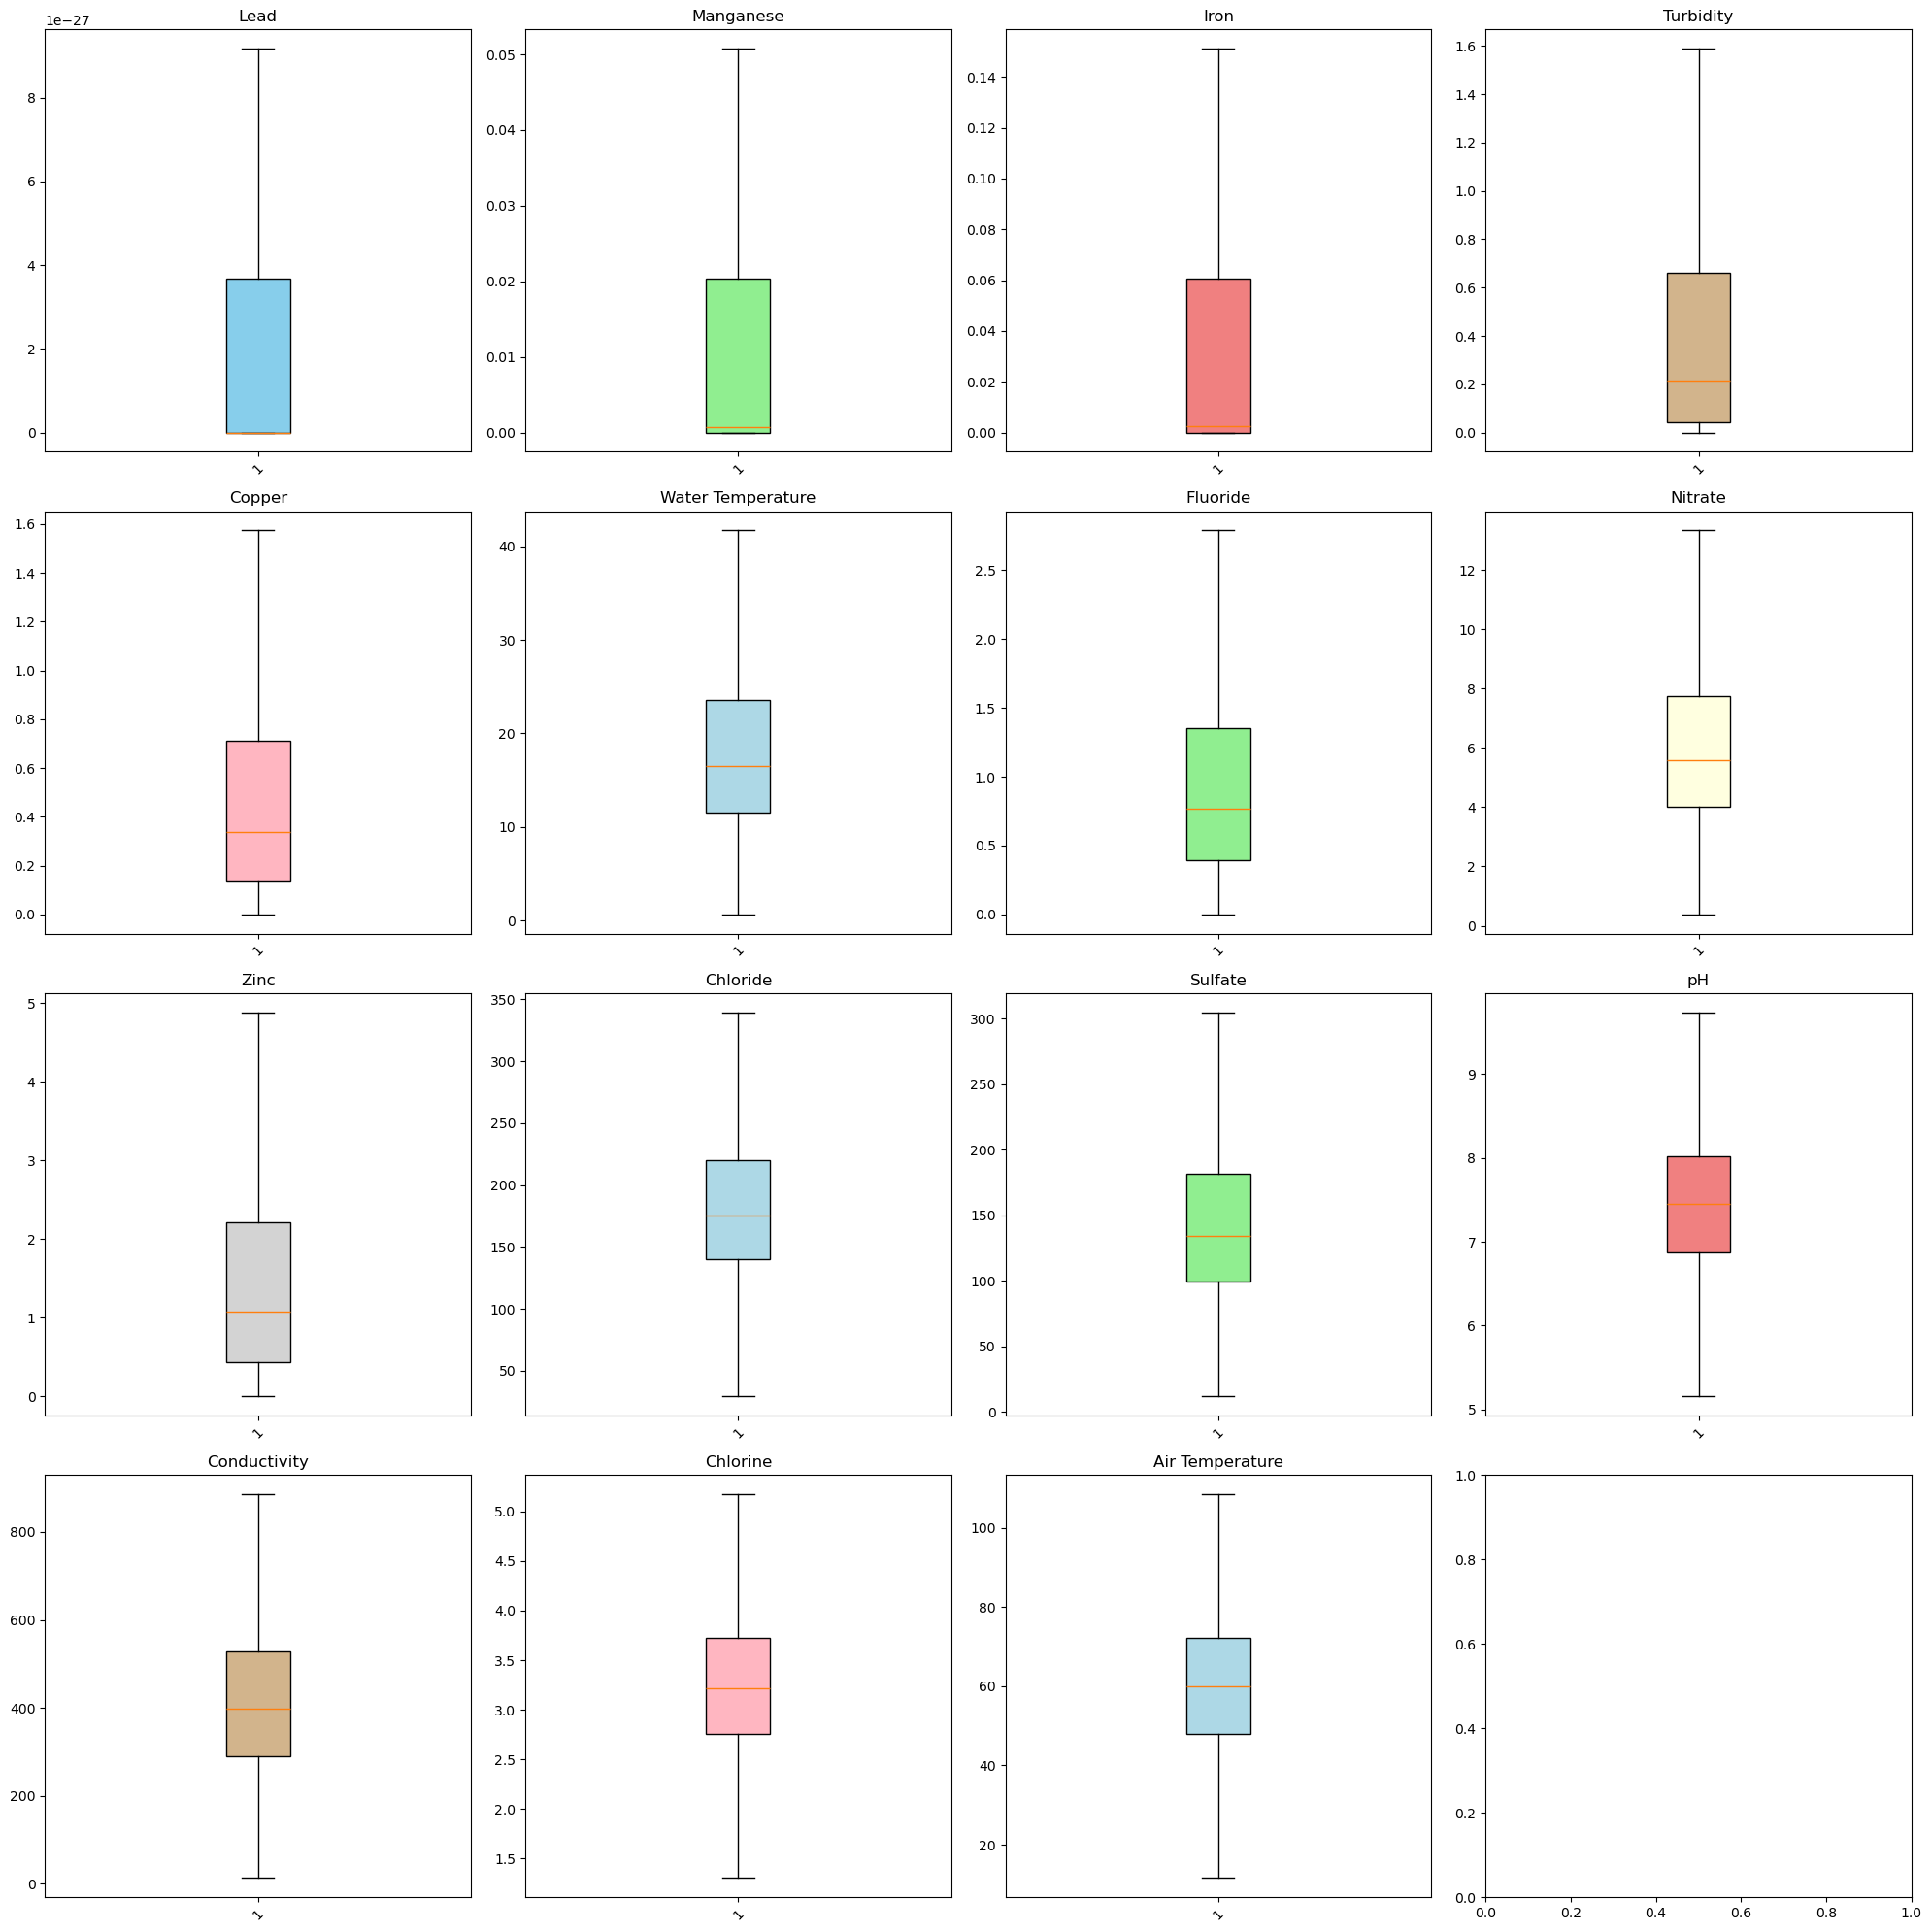

In [30]:
filtered_features = [col for col in outlier_features if col in balanced_data.columns]

# Set up the grid
fig, axs = plt.subplots(4, 4, figsize=(20, 20))  # 4 rows and 4 columns to fit the top 15 features
axs = axs.ravel()  # Flatten axes array

# Define colors for the boxplots
colors = ['skyblue', 'lightgreen', 'lightcoral', 'tan', 'lightpink', 'lightblue', 'lightgreen', 'lightyellow', 'lightgrey', 'lightblue', 'lightgreen', 'lightcoral', 'tan', 'lightpink', 'lightblue', 'lightgreen']

for i, feature in enumerate(filtered_features):
    axs[i].boxplot(balanced_data[feature], patch_artist=True, boxprops=dict(facecolor=colors[i]))
    axs[i].set_title(f'{feature}')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [31]:
balanced_data

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
266755,5.916055,1.511157e-01,1.389334,84.513108,9.175000e-27,1.978032,2,0.248652,1.691318,1.574468,...,5.176003,1.152750e-02,52.369446,5,10.404332,42.508011,3,12.0,23.0,1
266756,7.505590,1.511157e-01,4.908973,190.443656,4.860000e-39,1.128556,3,0.000030,0.765429,1.276920,...,2.635055,1.672900e-04,232.941036,4,12.522236,63.289036,6,4.0,1.0,1
266757,6.703964,1.370200e-04,10.552672,211.930128,1.890000e-48,2.848238,0,0.081378,1.610560,0.460880,...,3.265975,7.470000e-12,330.241630,3,15.644198,84.323390,4,28.0,16.0,1
266758,5.396613,5.040000e-06,5.703348,225.017979,1.920000e-28,0.400466,0,0.154662,0.070338,0.162591,...,3.287618,2.900000e-07,80.026017,5,18.005467,55.267615,3,21.0,9.0,1
266759,8.055677,2.560466e-03,4.517260,132.104241,9.175000e-27,1.923391,3,0.010267,1.878288,0.449246,...,3.505797,1.630000e-08,67.661410,4,41.684378,58.447806,4,11.0,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927154,9.074379,1.620000e-11,13.335054,139.408074,9.175000e-27,2.272391,1,0.026557,2.788976,0.021516,...,3.838962,5.230000e-07,198.535431,0,10.102085,53.247381,1,17.0,13.0,0
1016587,7.735377,6.270000e-05,9.235118,129.962724,0.000000e+00,1.492708,1,0.190837,0.929831,0.749208,...,2.240113,5.641320e-04,7.894001,4,23.901895,74.357217,10,19.0,0.0,0
100212,8.316506,1.997151e-02,4.802256,226.751982,2.630000e-89,0.463599,3,0.104020,0.310922,0.107488,...,3.144873,7.073531e-03,496.271943,5,16.406385,95.362084,2,13.0,0.0,0
932023,7.344490,9.048599e-02,7.505418,117.056466,4.000000e-29,3.404467,1,0.280732,1.172292,0.126649,...,4.157302,6.290000e-05,52.502207,3,32.537791,57.641249,10,1.0,9.0,0


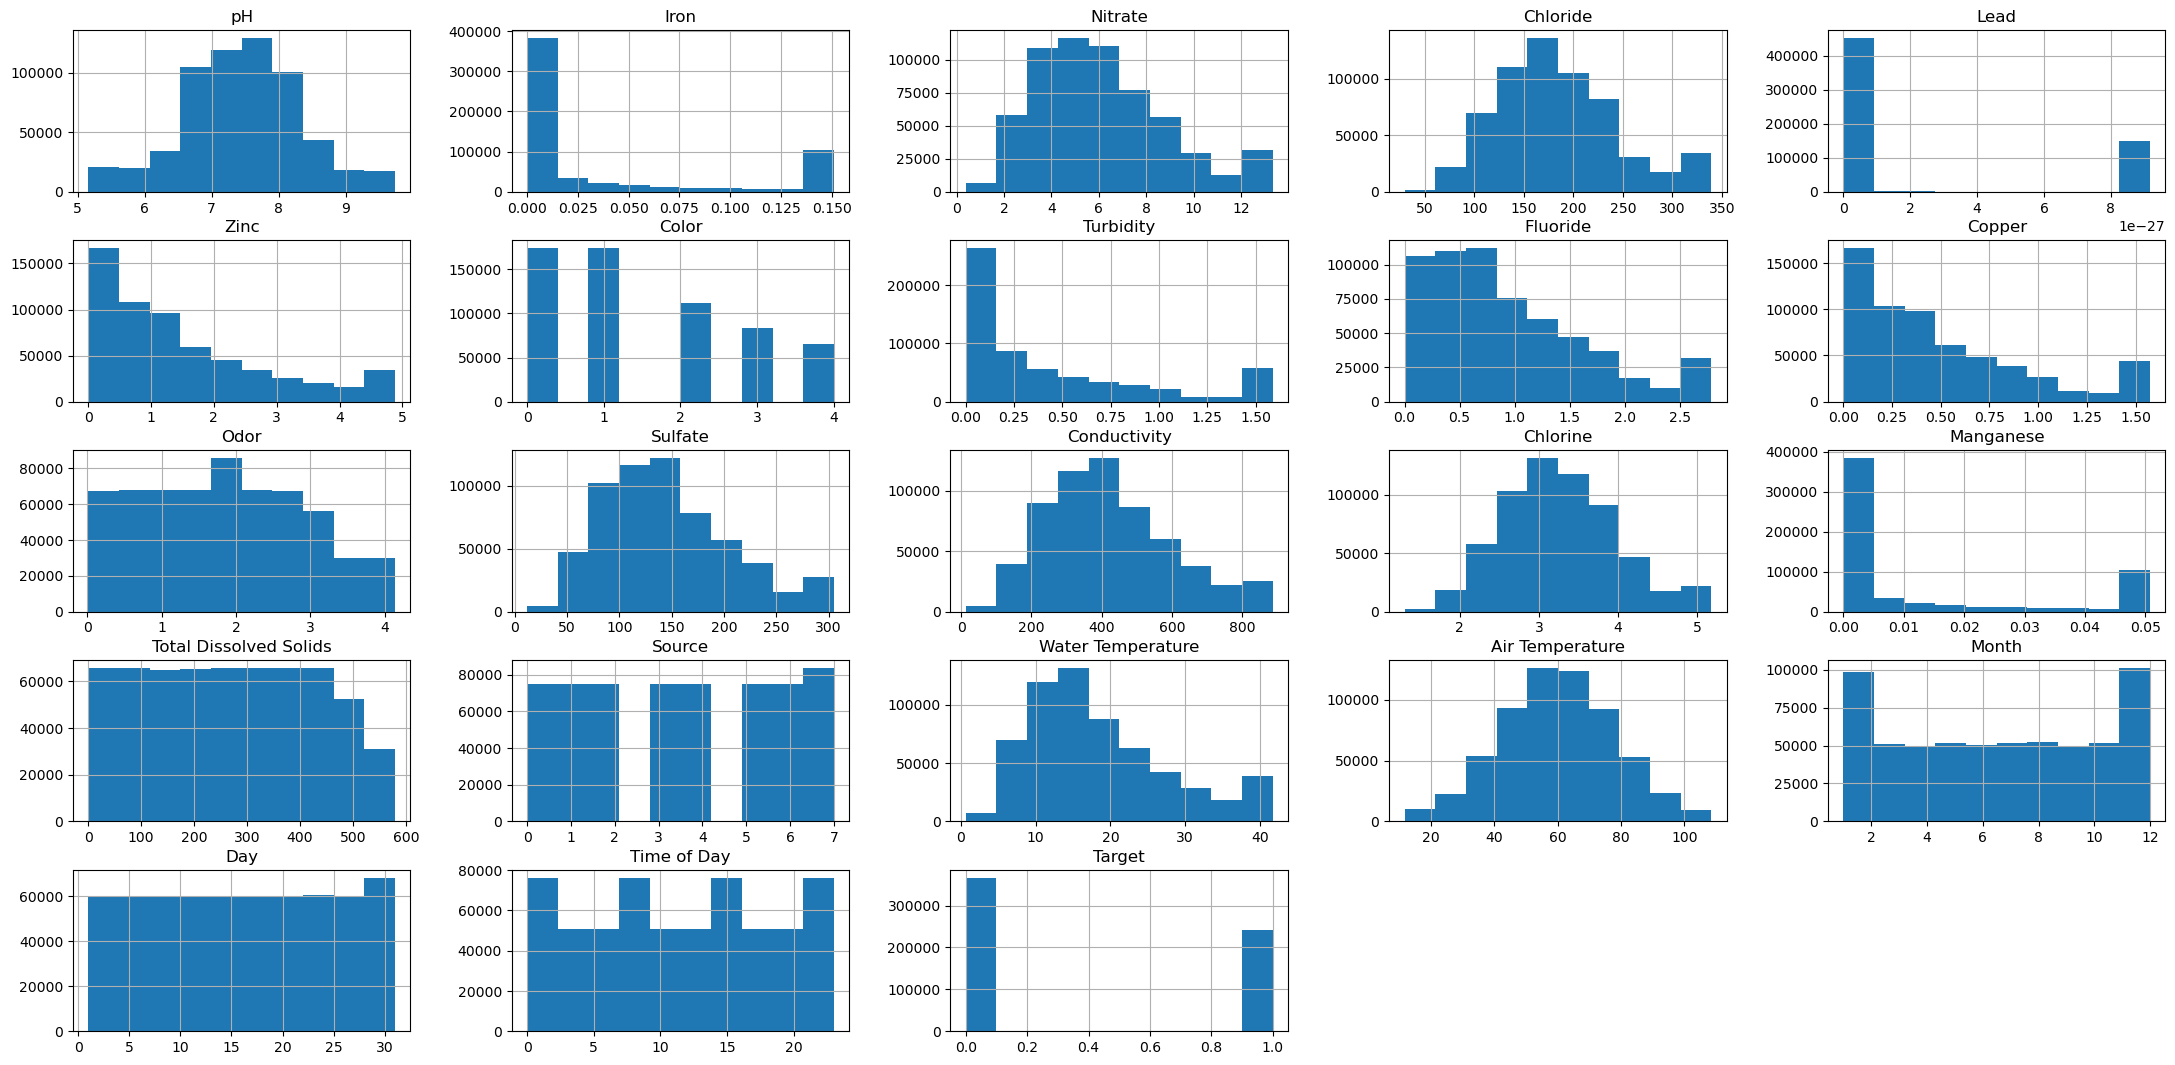

In [32]:
balanced_data.hist(figsize=(27,13))
plt.show()

# Partitioning Data into Features Columns & Target veriable 

In [25]:
 X = balanced_data.drop('Target', axis=1) # Input Column

In [26]:
 Y = balanced_data['Target']  # Target Variable

In [27]:
 from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, shuffle=True, random_state=101)

# Normalization (Scaling)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Mode Building

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV


# Logistic Regression

In [42]:
# Train and evaluate Logistic Regression with cross-validation
logistic_regression = LogisticRegression(random_state=101)
lr_cv_scores = cross_val_score(logistic_regression, X_train, Y_train, cv=5)  # 5-fold cross-validation
logistic_regression.fit(X_train, Y_train)
lr_accuracy = accuracy_score(Y_test, logistic_regression.predict(X_test))
lr_precision = precision_score(Y_test, logistic_regression.predict(X_test))
lr_recall = recall_score(Y_test, logistic_regression.predict(X_test))
lr_f1 = f1_score(Y_test, logistic_regression.predict(X_test))

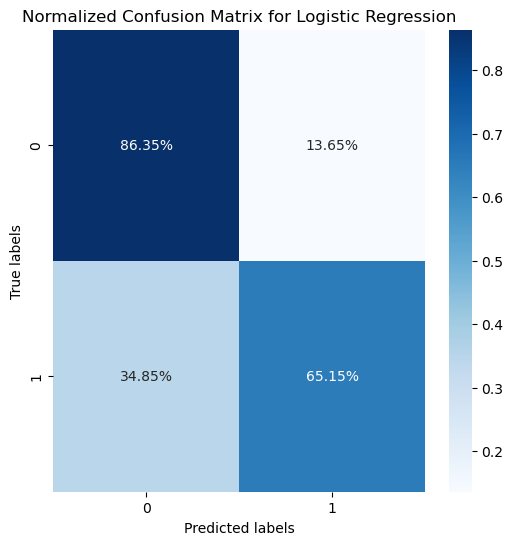

In [44]:
# Normalize confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(Y_test, logistic_regression.predict(X_test))
conf_matrix_lr_percent = conf_matrix_lr / conf_matrix_lr.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lr_percent, annot=True, cmap='Blues', fmt='.2%')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix for Logistic Regression')
plt.show()

# DT

In [45]:
# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=10, splitter='best', random_state=101)

decision_tree.fit(X_train, Y_train)
dt_accuracy = accuracy_score(Y_test, decision_tree.predict(X_test))
dt_precision = precision_score(Y_test, decision_tree.predict(X_test))
dt_recall = recall_score(Y_test, decision_tree.predict(X_test))
dt_f1 = f1_score(Y_test, decision_tree.predict(X_test))

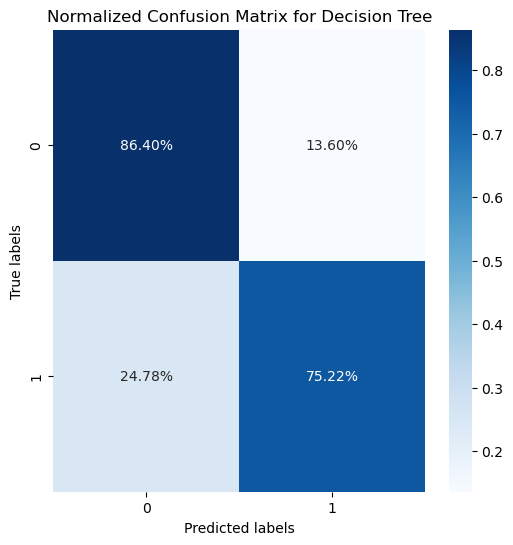

In [47]:
# Normalize confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(Y_test, decision_tree.predict(X_test))
conf_matrix_dt_percent = conf_matrix_dt / conf_matrix_dt.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dt_percent, annot=True, cmap='Blues', fmt='.2%')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix for Decision Tree')
plt.show()

# Naive Bayes

In [48]:
# Train and evaluate Naive Bayes with cross-validation
naive_bayes = GaussianNB()
nb_cv_scores = cross_val_score(naive_bayes, X_train, Y_train, cv=5)
# 5-fold cross-validation
naive_bayes.fit(X_train, Y_train)
nb_accuracy = accuracy_score(Y_test, naive_bayes.predict(X_test))
nb_precision = precision_score(Y_test, naive_bayes.predict(X_test))
nb_recall = recall_score(Y_test, naive_bayes.predict(X_test))
nb_f1 = f1_score(Y_test, naive_bayes.predict(X_test))

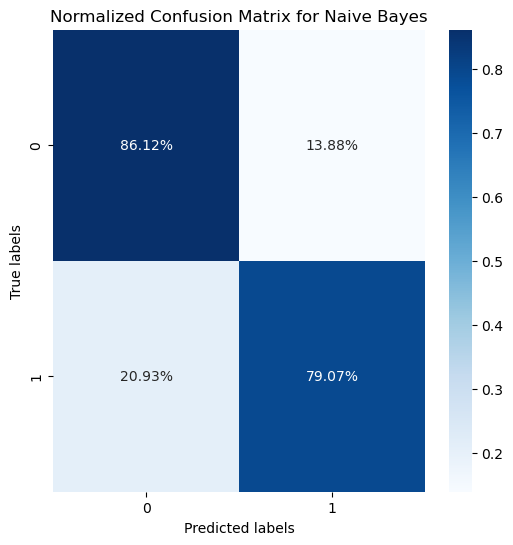

In [50]:
# Normalize confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(Y_test, naive_bayes.predict(X_test))
conf_matrix_nb_percent = conf_matrix_nb / conf_matrix_nb.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb_percent, annot=True, cmap='Blues', fmt='.2%')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix for Naive Bayes')
plt.show()

# LightGBM

In [51]:
# Train and evaluate Light GBM
lgb_model = lgb.LGBMClassifier(random_state=101)
lgb_model.fit(X_train, Y_train)
lgb_accuracy = accuracy_score(Y_test, lgb_model.predict(X_test))
lgb_precision = precision_score(Y_test, lgb_model.predict(X_test))
lgb_recall = recall_score(Y_test, lgb_model.predict(X_test))
lgb_f1 = f1_score(Y_test, lgb_model.predict(X_test))

[LightGBM] [Info] Number of positive: 168573, number of negative: 256841
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4420
[LightGBM] [Info] Number of data points in the train set: 425414, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.396256 -> initscore=-0.421088
[LightGBM] [Info] Start training from score -0.421088


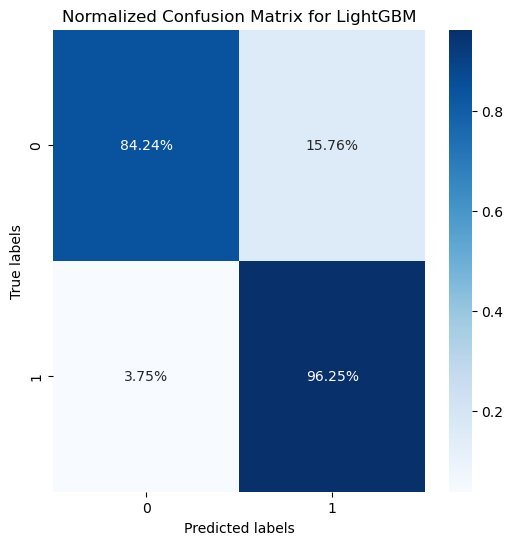

In [52]:
# Compute confusion matrix for LightGBM
conf_matrix_lgb = confusion_matrix(Y_test, lgb_model.predict(X_test))
conf_matrix_lgb_percent = conf_matrix_lgb / conf_matrix_lgb.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lgb_percent, annot=True, cmap='Blues', fmt='.2%')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix for LightGBM')
plt.show()

# Model Comparison

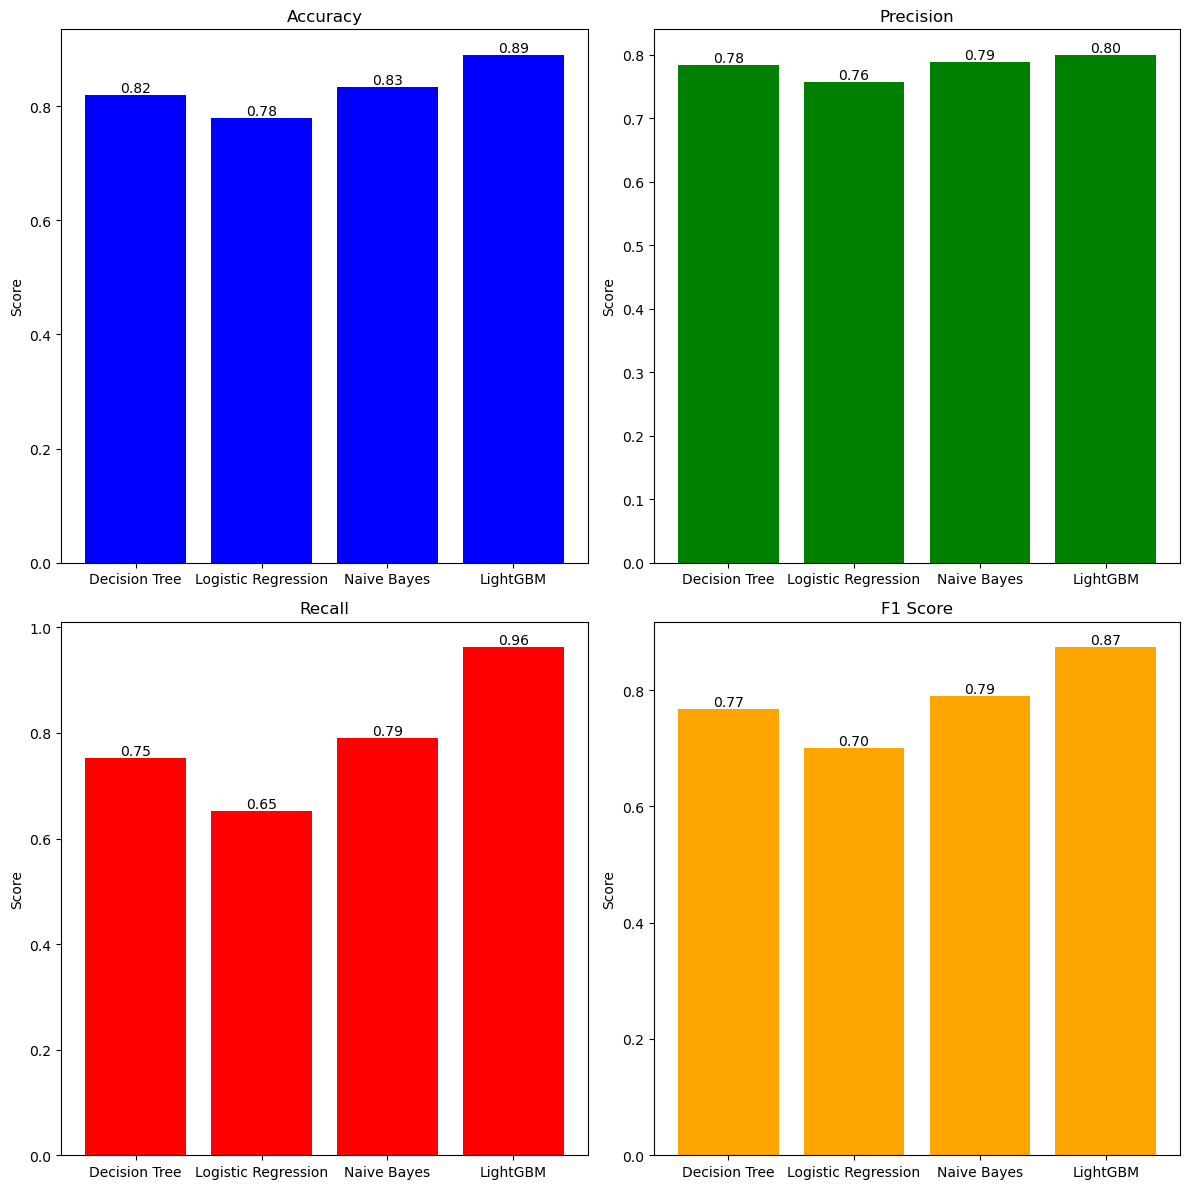

In [53]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Logistic Regression', 'Naive Bayes', 'LightGBM']

accuracy_scores = [dt_accuracy, lr_accuracy, nb_accuracy, lgb_accuracy]
precision_scores = [dt_precision, lr_precision, nb_precision, lgb_precision]
recall_scores = [dt_recall, lr_recall, nb_recall, lgb_recall]
f1_scores = [dt_f1, lr_f1, nb_f1, lgb_f1]

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
bars = plt.bar(models, accuracy_scores, color='blue')
plt.title('Accuracy')
plt.ylabel('Score')

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.subplot(2, 2, 2)
bars = plt.bar(models, precision_scores, color='green')
plt.title('Precision')
plt.ylabel('Score')

for bar, score in zip(bars, precision_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.subplot(2, 2, 3)
bars = plt.bar(models, recall_scores, color='red')
plt.title('Recall')
plt.ylabel('Score')

for bar, score in zip(bars, recall_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.subplot(2, 2, 4)
bars = plt.bar(models, f1_scores, color='orange')
plt.title('F1 Score')
plt.ylabel('Score')

for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Model Hyperparameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],  # Varying the value of var_smoothing
    'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]  # Varying the value of priors
}

# Initialize Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Naive Bayes with the best parameters
best_naive_bayes = GaussianNB(var_smoothing=best_params['var_smoothing'], priors=best_params['priors'])
best_naive_bayes.fit(X_train, Y_train)

# Evaluate performance
nb_accuracy = best_naive_bayes.score(X_test, Y_test)
nb_precision = precision_score(Y_test, best_naive_bayes.predict(X_test))
nb_recall = recall_score(Y_test, best_naive_bayes.predict(X_test))
nb_f1 = f1_score(Y_test, best_naive_bayes.predict(X_test))

print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)

Best Parameters: {'priors': [0.3, 0.7], 'var_smoothing': 1e-09}
Accuracy: 0.8419705957366286
Precision: 0.7547722381002787
Recall: 0.889623622374714
F1 Score: 0.8166685755736265


# On tuning  Navie Bayes it gives one percentage of increase in accuracy from 0.83 to 0.84

# Attempted hyperparameter tuning on the LightGBM model but observed a decrease in accuracy, which may indicate overfitting.